## Plotting the scheduling example in the motivation section

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [167]:
PERIOD = 200

A="dusseldorf"
a_start_acc = 84.1
a_start_acc = 74.1
a_cfgs = {
    "high": {"train_time": 95.7, "acc": 87.6},
    "low_orig": {"train_time": 36.1, "acc": 86.4},
    "low": {"train_time": 65.1, "acc": 86.4},
    "no": {"train_time": 0, "acc": a_start_acc}
}


B="aachen"
b_start_acc = 68.8
b_start_acc = 48.8
b_cfgs = {
    "high": {"train_time": 80.8, "acc": 77.8},
    "low_orig": {"train_time": 22.9, "acc": 75.7},
    "low": {"train_time": 55.9, "acc": 75.7},
    "no": {"train_time": 0, "acc": b_start_acc}
}

INF_RES_REQ = 0.5

In [134]:
# PERIOD = 200

# A="dusseldorf"
# a_start_acc = 84.1
# a_start_acc = 84.1
# a_cfgs = {
#     "high": {"train_time": 95.7, "acc": 87.6},
#     "low_orig": {"train_time": 36.1, "acc": 86.4},
#     "low": {"train_time": 75.1, "acc": 86.4},
#     "no": {"train_time": 0, "acc": a_start_acc}
# }


# B="aachen"
# b_start_acc = 68.8
# b_start_acc = 38.8
# b_cfgs = {
#     "high": {"train_time": 80.8, "acc": 77.8},
#     "low_orig": {"train_time": 22.9, "acc": 75.7},
#     "low": {"train_time": 60.9, "acc": 75.7},
#     "no": {"train_time": 0, "acc": b_start_acc}
# }

# INF_RES_REQ = 0.5

# Baseline

In [168]:
def inference_acc_slowdown(res, base_res=INF_RES_REQ, k=1):
    return min(1/((base_res/res)/k), 1)

def run(a_cfg, b_cfg, a_res_alloc=0.5, b_res_alloc=0.5, a_train_split=0.5, b_train_split=0.5, title="", labelA="", labelB=""):
    total_res = 1
    a_final_acc = a_cfg["acc"]
    b_final_acc = b_cfg["acc"]

    a_inference_res = min(a_train_split*(a_res_alloc), INF_RES_REQ)
    a_train_res = a_res_alloc - a_inference_res
    b_inference_res = min(b_train_split*(b_res_alloc), INF_RES_REQ)
    b_train_res = b_res_alloc - b_inference_res

    a_completion_time = a_cfg["train_time"]/a_train_res
    b_completion_time = b_cfg["train_time"]/b_train_res

    print("A inf res: {}. A train res {}.".format(a_inference_res, a_train_res))
    print("B inf res: {}. B train res {}.".format(b_inference_res, b_train_res))
    print("A completion time: {}. B completion time {}.".format(a_completion_time, b_completion_time))

    # Compute inference accuracy curves
    a_inference_acc = []
    a_acc_redn_factor = inference_acc_slowdown(a_inference_res)
    a_acc_redn_factor_posttrain = inference_acc_slowdown(a_res_alloc) # All res for a
    print("A inference speed factor: {}".format(a_acc_redn_factor))
    for i in range(0, min(int(a_completion_time), PERIOD)):
        a_inference_acc.append(a_acc_redn_factor*a_start_acc)
    if int(a_completion_time) < PERIOD:
        for i in range(int(a_completion_time), PERIOD):
            a_inference_acc.append(a_acc_redn_factor_posttrain*a_final_acc)


    b_inference_acc = []
    b_acc_redn_factor = inference_acc_slowdown(b_inference_res)
    b_acc_redn_factor_posttrain = inference_acc_slowdown(b_res_alloc) # All res for b
    print("B inference speed factor: {}".format(b_acc_redn_factor))
    for i in range(0, min(int(b_completion_time), PERIOD)):
        b_inference_acc.append(b_acc_redn_factor*b_start_acc)
    if int(b_completion_time) < PERIOD:
        for i in range(int(b_completion_time), PERIOD):
            b_inference_acc.append(b_acc_redn_factor_posttrain*b_final_acc)

    print("Done. a_mean_acc: {}. b_mean_acc: {}. Overall mean acc: {}".format(np.mean(a_inference_acc),
                                                                              np.mean(b_inference_acc),
                                                                             (np.mean(a_inference_acc) + 
                                                                              np.mean(b_inference_acc))/2))

    plt.plot(a_inference_acc, label=labelA)
    plt.plot(b_inference_acc, label=labelB)
    plt.legend()
    plt.title(title + " Mean Acc: {}".format((np.mean(a_inference_acc) + np.mean(b_inference_acc))/2))
    plt.xlabel("Wall time")
    plt.ylabel("Accuracy")

No handles with labels found to put in legend.


A inf res: 0.5. A train res 0.5.
B inf res: 0.5. B train res 0.5.
A completion time: 0.0. B completion time 0.0.
A inference speed factor: 1.0
B inference speed factor: 1.0
Done. a_mean_acc: 74.10000000000002. b_mean_acc: 48.8. Overall mean acc: 61.45000000000001


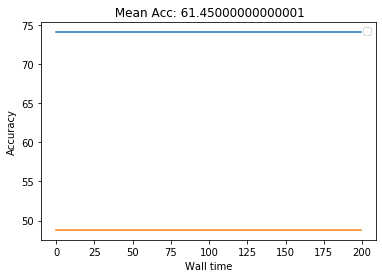

In [169]:
# No retraining
run(a_cfgs["no"], b_cfgs["no"], a_res_alloc=1, b_res_alloc=1)

A inf res: 0.5. A train res 0.5.
B inf res: 0.5. B train res 0.5.
A completion time: 191.4. B completion time 161.6.
A inference speed factor: 1.0
B inference speed factor: 1.0
Done. a_mean_acc: 74.70750000000002. b_mean_acc: 54.455. Overall mean acc: 64.58125000000001


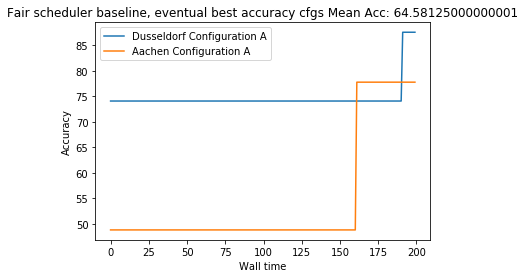

In [170]:
# Fair sharing and picking highest acc hyperparams
run(a_cfgs["high"], b_cfgs["high"], a_res_alloc=1, b_res_alloc=1, title = "Fair scheduler baseline, eventual best accuracy cfgs", labelA = "Dusseldorf Cfg A", labelB = "Aachen Cfg A")
plt.savefig("schedmot_eventual_best_cfgs.pdf")

A inf res: 0.5. A train res 0.5.
B inf res: 0.5. B train res 0.5.
A completion time: 130.2. B completion time 111.8.
B will relinquish 0.5
B inference speed factors: 1.0, posttrain: 1.0
A inference speed factor: 1.0
Remaining wall time: 9.5, new_remaining_res_time: 9
A actual completion time: 120
Done. a_mean_acc: 79.02. b_mean_acc: 60.77050000000001. Overall mean acc: 69.89525


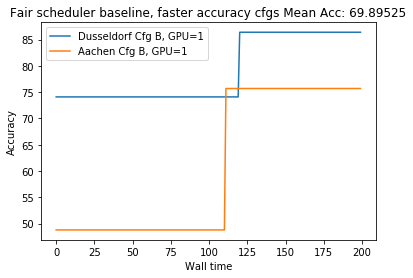

In [178]:
# Fair sharing and picking optimal hyperparams
run2(a_cfgs["low"], b_cfgs["low"], a_res_alloc=1, b_res_alloc=1, title = "Fair scheduler baseline, faster accuracy cfgs", labelA = "Dusseldorf Cfg B, GPU=1", labelB = "Aachen Cfg B, GPU=1")
plt.savefig("schedmot_optimal_cfgs.pdf")

A inf res: 0.495. A train res 0.0050000000000000044.
B inf res: 0.5. B train res 1.0.
A completion time: 13019.999999999987. B completion time 55.9.
B will relinquish 1.0
B inference speed factors: 1.0, posttrain: 1.0
A inference speed factor: 0.99
Remaining wall time: 64.82000000000006, new_remaining_res_time: 64
A actual completion time: 119
Done. a_mean_acc: 78.640605. b_mean_acc: 68.30250000000002. Overall mean acc: 73.4715525


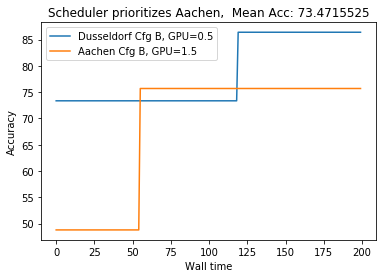

In [180]:
# Prioritizing B and picking optimal hyperparams
run2(a_cfgs["low"], b_cfgs["low"], a_res_alloc=0.5, b_res_alloc=1.5, a_inference_split=0.99,
     title = "Scheduler prioritizes Aachen, ", labelA = "Dusseldorf Cfg B, GPU=0.5", labelB = "Aachen Cfg B, GPU=1.5")
plt.savefig("schedmot_prioritization_and_optimal_cfgs.pdf")

In [172]:
def inference_acc_slowdown(res, base_res=INF_RES_REQ, k=1):
    return min(1/((base_res/res)/k), 1)

def run2(a_cfg, b_cfg, a_res_alloc=1, b_res_alloc=1, a_inference_split=0.5, b_inference_split=0.5, max_inference_res=INF_RES_REQ,
        title="", labelA="", labelB=""):
    # When b finishes first and relinquishes resources
    total_res = 1
    a_final_acc = a_cfg["acc"]
    b_final_acc = b_cfg["acc"]
    
    a_inference_res = min(a_inference_split*(a_res_alloc), max_inference_res)
    a_train_res = a_res_alloc - a_inference_res
    b_inference_res = min(b_inference_split*(b_res_alloc), max_inference_res)
    b_train_res = b_res_alloc - b_inference_res

    a_completion_time = a_cfg["train_time"]/a_train_res
    b_completion_time = b_cfg["train_time"]/b_train_res

    print("A inf res: {}. A train res {}.".format(a_inference_res, a_train_res))
    print("B inf res: {}. B train res {}.".format(b_inference_res, b_train_res))
    print("A completion time: {}. B completion time {}.".format(a_completion_time, b_completion_time))

    b_inference_acc = []
    b_acc_redn_factor = inference_acc_slowdown(b_inference_res)
    relinquished_res = b_res_alloc - max_inference_res
    assert relinquished_res > 0
    print("B will relinquish {}".format(relinquished_res))
    b_acc_redn_factor_posttrain = inference_acc_slowdown(max_inference_res) # All res for b
    print("B inference speed factors: {}, posttrain: {}".format(b_acc_redn_factor, b_acc_redn_factor_posttrain))
    for i in range(0, int(b_completion_time)):
        b_inference_acc.append(b_acc_redn_factor*b_start_acc)
    for i in range(int(b_completion_time), PERIOD):
        b_inference_acc.append(b_acc_redn_factor_posttrain*b_final_acc)
        
    # Compute inference accuracy curves
    a_inference_acc = []
    a_acc_redn_factor = inference_acc_slowdown(a_inference_res)
    print("A inference speed factor: {}".format(a_acc_redn_factor))
    # till b is completed
    for i in range(0, int(b_completion_time)):
        a_inference_acc.append(a_acc_redn_factor*a_start_acc)
    # Till a is completed
    remaining_wall_time = (int(a_completion_time) - int(b_completion_time))*a_train_res
    new_remaining_res_time = int(remaining_wall_time/(a_train_res + relinquished_res))
    print("Remaining wall time: {}, new_remaining_res_time: {}".format(remaining_wall_time, new_remaining_res_time))
    new_completion_time = int(b_completion_time)+new_remaining_res_time
    #a_acc_redn_factor = inference_acc_slowdown(a_inference_res + relinquished_res)
    a_acc_redn_factor_posttrain = inference_acc_slowdown(a_res_alloc + relinquished_res)
    print("A actual completion time: {}".format(new_completion_time))
    for i in range(int(b_completion_time), new_completion_time):
        a_inference_acc.append(a_acc_redn_factor*a_start_acc)    
    for i in range(int(b_completion_time)+new_remaining_res_time, PERIOD):
        a_inference_acc.append(a_acc_redn_factor_posttrain*a_final_acc)

    print("Done. a_mean_acc: {}. b_mean_acc: {}. Overall mean acc: {}".format(np.mean(a_inference_acc),
                                                                              np.mean(b_inference_acc),
                                                                             (np.mean(a_inference_acc) + 
                                                                              np.mean(b_inference_acc))/2))

    plt.plot(a_inference_acc, label=labelA)
    plt.plot(b_inference_acc, label=labelB)
    plt.legend()
    plt.title(title + " Mean Acc: {}".format((np.mean(a_inference_acc) + np.mean(b_inference_acc))/2))
    plt.xlabel("Wall time")
    plt.ylabel("Accuracy")